# Import libraries

In [1]:
import warnings
import numpy as np 
import pandas as pd

warnings.filterwarnings('ignore')

# Reading data

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
# removing index column as it isnt useful
df = df.iloc[:, 1:]

In [4]:
# about data
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# importing library to encode the species
from sklearn.preprocessing import LabelEncoder

In [6]:
# created object of the encoder
encoder = LabelEncoder()

In [7]:
# The fit_transform() Sklearn method is basically the combination of the fit method and the transform method. 
# This method simultaneously performs fit and transform operations on the input data and converts the data points
# https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

df['Species'] = encoder.fit_transform(df['Species'])

In [8]:
# for simplicity we are only taking 2 classes [1, 2] and 2 columns [a little difficult columns to predict]
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [9]:
# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

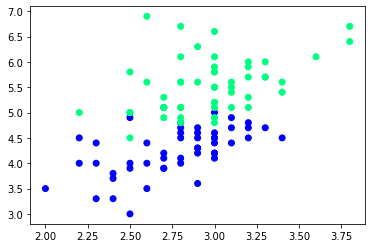

In [10]:
# as we have 2 columns we can check it with scatter plot
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c = df['Species'],cmap = 'winter')
plt.show()

In [11]:
# we have 100 data points so, taking 60 for training and taking taking 10 samples from these 60 points
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
62,2.2,4.0,1
98,2.5,3.0,1
87,2.3,4.4,1
69,2.5,3.9,1
94,2.7,4.2,1
100,3.3,6.0,2
63,2.9,4.7,1
66,3.0,4.5,1
104,3.0,5.8,2


In [12]:
df = df.sample(100)

# training set with 60 data points and 10 samples
df_train = df.iloc[:60,:].sample(10)

# validation set with 20 data points and 5 samples
df_val = df.iloc[60:80,:].sample(5)

# test set with 20 data points and 5 samples
df_test = df.iloc[80:,:].sample(5)

In [13]:
# validation set is like testing data, splitting the x and y data

# taking independent columns
X_test = df_val.iloc[:,0:2].values

# taking dependent column, which is spieces
y_test = df_val.iloc[:,-1].values

In [14]:
# Data for Tree 1
df_bag = df_train.sample(8, replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
74,2.9,4.3,1
118,2.6,6.9,2
107,2.9,6.3,2
75,3.0,4.4,1
149,3.0,5.1,2
114,2.8,5.1,2
52,3.1,4.9,1
118,2.6,6.9,2


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [16]:
dt_bag1 = DecisionTreeClassifier()

In [17]:
# creating function for evaluation

# taking classifier, x and y as input
def evaluate(clf,X,y):

    # applying fit method to X, y to find the suitable parameters for the data
    clf.fit(X,y)

    # plotting the tree
    plot_tree(clf)
    plt.show()

    # plotting decision boundary
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)

    # predicting on the test set which we took out from validation set
    y_pred = clf.predict(X_test)

    # printing accuracy score 
    print(accuracy_score(y_test,y_pred))

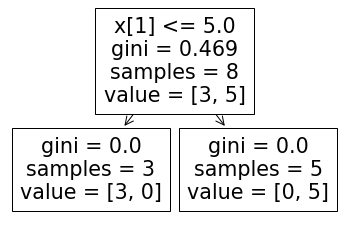

0.8


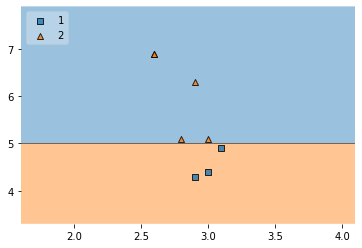

In [18]:
# calling the function
evaluate(dt_bag1,X,y)

In [19]:
# Data for Tree 2
# here replace = true --> meaning (meaning rows will repeat) as we can see below
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
125,3.2,6.0,2
75,3.0,4.4,1
114,2.8,5.1,2
107,2.9,6.3,2
125,3.2,6.0,2
125,3.2,6.0,2
75,3.0,4.4,1
125,3.2,6.0,2


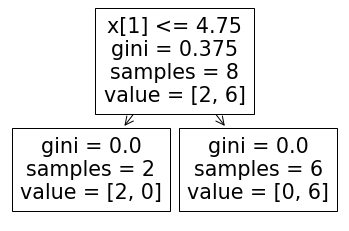

1.0


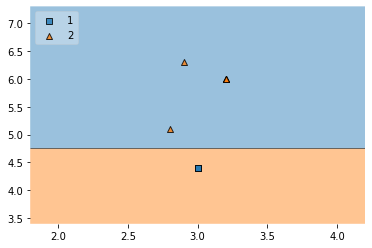

In [20]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [21]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
74,2.9,4.3,1
74,2.9,4.3,1
52,3.1,4.9,1
118,2.6,6.9,2
99,2.8,4.1,1
118,2.6,6.9,2
114,2.8,5.1,2
52,3.1,4.9,1


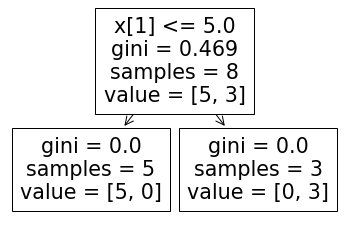

0.8


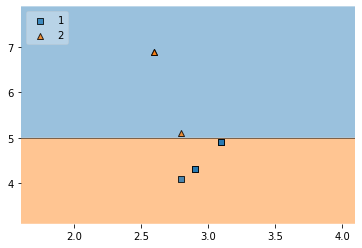

In [22]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [23]:
print("Predictor 1",dt_bag1.predict(np.array([5.0, 3.6]).reshape(1,2)))
if dt_bag1.predict(np.array([5.0, 3.6]).reshape(1,2)) == 1:
    print('Iris setosa')
print("Predictor 2",dt_bag2.predict(np.array([5.0, 3.6]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([5.0, 3.6]).reshape(1,2)))

Predictor 1 [1]
Iris setosa
Predictor 2 [1]
Predictor 3 [1]


# Bagging using scikit-learn library

In [24]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [25]:
X, y = make_classification(n_samples = 10000, n_features = 10, n_informative = 3)

In [26]:
print(X[:2], y[:2])

[[ 1.37455048  0.07453476 -0.80261712 -1.39000399  1.20292311  1.32939811
  -0.74042688 -1.52461474  0.58076207 -2.72427086]
 [-0.77984887 -0.59391215  0.49731294  0.86307204  0.1133907   1.38103122
   0.63313974  0.79987965  0.34342314 -0.45698975]] [0 1]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# predicting with decision tree classifier 
dt = DecisionTreeClassifier(random_state=42)

# fitting the data 
dt.fit(X_train,y_train)

# predicting on test data
y_pred = dt.predict(X_test)

# calculating accuracy score
print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.8725


# Bagging classifier

In [29]:
dt1 = DecisionTreeClassifier()

bag = BaggingClassifier(
    base_estimator=dt1,
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [30]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=42)

In [31]:
y_pred = bag.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.9135

In [33]:
bag.estimators_samples_[0].shape

(4000,)

In [34]:
bag.estimators_features_[0].shape

(10,)

# Bagging with SVM

In [35]:
svc_bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [36]:
svc_bag.fit(X_train,y_train)
y_pred = svc_bag.predict(X_test)
print("Bagging using SVM",accuracy_score(y_test,y_pred))

Bagging using SVM 0.8815


# Bagging with Pasting - sampling without replacement (unique rows will be taken, no repetition)

In [37]:
past_bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose = 1,
    n_jobs=-1
)

In [38]:
past_bag.fit(X_train,y_train)
y_pred = past_bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   20.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Pasting classifier 0.915


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished


# Random Subspaces - only column sampling

In [39]:
col_bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)

In [40]:
col_bag.fit(X_train,y_train)
y_pred = col_bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

Pasting classifier 0.8835


In [41]:
col_bag.estimators_samples_[0].shape

(8000,)

In [42]:
col_bag.estimators_features_[0].shape

(5,)

# Random Patches - column sampling and row sampling

In [43]:
row_col_bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42,
    n_jobs = -1
)

In [44]:
row_col_bag.fit(X_train,y_train)
y_pred = row_col_bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.8755


# OOB Score - out of bag score
* when we do row sampling with replacement there are certain rows which are never used or seen by the estimators.
* It is an estimate that, around 37% rows are neot seen.
* https://stats.stackexchange.com/questions/88980/why-on-average-does-each-bootstrap-sample-contain-roughly-two-thirds-of-observat/88993#88993
* So these rows are used to roughly estimate the accuracy score we would get on testing data.

In [45]:
oob_bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs = -1
)

In [46]:
oob_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)

In [47]:
oob_bag.oob_score_

0.911375

In [48]:
y_pred = oob_bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.911


# Bagging tips
* Bagging generally gives better results than Pasting
* https://datascience.stackexchange.com/questions/72072/bagging-vs-pasting-in-ensemble-learning
* Good results come around the 25% to 50% row sampling mark
* Random patches and subspaces should be used while dealing with high dimensional data
* To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

# Applying GridSearchCV

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters = {
#     'n_estimators': [50,100,500], 
#     'max_samples': [0.1,0.4,0.7,1.0],
#     'bootstrap' : [True,False],
#     'max_features' : [0.1,0.4,0.7,1.0]
#     }     

In [ ]:
# search = GridSearchCV(BaggingClassifier(), parameters, cv=5, n_jobs=-1)

In [ ]:
# search.fit(X_train,y_train)

In [ ]:
# search.best_params_
# search.best_score_

In [ ]:
# search.best_params_

# Bagging v RandomForest
1] Bagging can take DT, SVM, KNN as base estimators.

2] Random Forest can only take DTs.

3] Feature selection 
* In bagging tree level sampling is done --> if col 2, 3 is selected then that tree will have samples from these cols only
* In random forest node level sampling is done --> at every node sampling is done, every node will split on 2 different cols.
* This brings randomness in data and sometimes, RF performs better than Bagging.